In [102]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
Data = pd.read_csv('hotelbookingdata.csv')
Data.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,0,0% no offer,2017,11,1,0
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,1,1,0
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2017,12,0,1
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,1-15% offer,2017,12,0,1
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,2,1,0


In [104]:
# Loading the GDP data for filtering
gdp_df = pd.read_csv('GDP-Capita.csv')
gdp_df.head()

,Country Name,Country Code,2020,Region
0,Albania,ALB,5343.037704,Europe & Central Asia
1,Andorra,AND,37207.222000,Europe & Central Asia
2,Armenia,ARM,4505.867746,Europe & Central Asia
3,Austria,AUT,48809.226880,Europe & Central Asia
4,Azerbaijan,AZE,4229.910649,Europe & Central Asia


In [105]:
# Describing the column 2020:
gdp_df['2020'].describe()

count        57.000000
mean      34478.285091
std       37468.485426
min         852.330230
25%        7677.369141
50%       22242.406420
75%       49169.719340
max      182537.304600
Name: 2020, dtype: float64

As we can see 25% of the countries in this catagory have a GDP per Capita higher than 50000$.
These countries can be considered more similar in some ways and merged to a group.

In [106]:
# mapping the GDP data to the hotel booking data
Data['GDP'] = Data['addresscountryname'].map(gdp_df.set_index('Country Name')['2020'])
Data.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,GDP
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,...,4.3 /5,0,1.0,0,0% no offer,2017,11,1,0,52162.57012
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,4.3 /5,0,1.0,1,15-50% offer,2018,1,1,0,52162.57012
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,4.3 /5,0,1.0,1,15-50% offer,2017,12,0,1,52162.57012
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,...,4.3 /5,0,1.0,1,1-15% offer,2017,12,0,1,52162.57012
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,4.3 /5,0,1.0,1,15-50% offer,2018,2,1,0,52162.57012


In [107]:
# Checking for null values in gdp column
print(Data['GDP'].isnull().sum())
# Checking which countries have a missing GDP value
missing_gdp =Data[Data['GDP'].isnull()]['addresscountryname'].unique()
print(missing_gdp)

26032
['Slovakia' 'Cameroon' 'Turkey' 'Egypt' 'Russia' 'Czech Republic' 'Malta']


In [108]:
# Checking to find the similar countries in the gdp data
for i in missing_gdp:
    print(i)
    print(gdp_df[gdp_df['Country Name'].str.contains(i[:5])]['Country Name'].unique()) 

Slovakia
['Slovak Republic']
Cameroon
[]
Turkey
[]
Egypt
[]
Russia
['Russian Federation']
Czech Republic
['Czechia']
Malta
[]


As we can see, for some countries (Slovakia, Russia, Czech Republic) we were able to find the equivalent country names in world bank dataset. 
We replace the missing gdp value in _Data_ df with the values from __gdp_df__ and equivalent countries. 

In [109]:
# Replacing the missing gdp values in Data with the values from gdp_df and similar countries
for i in missing_gdp:
    if len(gdp_df[gdp_df['Country Name'].str.contains(i[:5])]['2020'].values) > 0:
        Data.loc[Data['addresscountryname'] == i, 'GDP'] = gdp_df[gdp_df['Country Name'].str.contains(i[:5])]['2020'].values[0]

## Data Filtering based on the GDP
* In this project we plan to predict to hotel prices in european countries which have a gdp per capita higher than 50000$. We filter the data considering this criteria.

In [110]:
# Filtering the data based on the countries with GDP values higher than 40000$ and lower than 60000$
df = Data[(Data['GDP'] > 40000) & (Data['GDP'] < 60000)]
df.head()


,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,GDP
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,...,4.3 /5,0,1.0,0,0% no offer,2017,11,1,0,52162.57012
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,4.3 /5,0,1.0,1,15-50% offer,2018,1,1,0,52162.57012
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,4.3 /5,0,1.0,1,15-50% offer,2017,12,0,1,52162.57012
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,...,4.3 /5,0,1.0,1,1-15% offer,2017,12,0,1,52162.57012
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,4.3 /5,0,1.0,1,15-50% offer,2018,2,1,0,52162.57012


## Data Cleaning
In the process of data cleaning we need to pave the following steps:
* __Inspect for Missing Values__: Check if there are any missing values in the columns that we intend to use.
* __Handle Categorical Data__: Convert categorical columns like city_actual, neighbourhood, etc., into a format suitable for machine learning models (e.g., through one-hot encoding).
* __Handle Numerical Data__: Convert distances from string to numerical format (e.g., center1distance). Also, scale or normalize numerical features if required.
* __Feature Selection and Labels__: Decide which columns will be used as input and which column will be the output.

In [111]:
# Checking the missing values
missing_values = df.isnull().sum()

# Checking the data types and unique values
data_types = df.dtypes
unique_values = df.nunique()

# Summarizing the above results
Data_summary = pd.DataFrame({'Data types': data_types, 'Unique values': unique_values, 'Missing values': missing_values})
Data_summary.sort_values(by = 'Missing values', ascending = False)

,Data types,Unique values,Missing values
rating2_ta,float64,9,2776
rating2_ta_reviewcount,float64,1615,2776
rating_reviewcount,float64,896,1338
guestreviewsrating,object,28,1338
holiday,int64,2,0
weekend,int64,2,0
month,int64,8,0
year,int64,2,0
offer_cat,object,5,0
offer,int64,2,0


In [112]:
# Extracting the guest score and converting it to float
df['guestreviewsrating'] = df['guestreviewsrating'].str.extract('(\d+)')
df['guestreviewsrating'] = df['guestreviewsrating'].astype(float)

C:\Users\PA\AppData\Local\Temp\ipykernel_18004\1729537003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['guestreviewsrating'] = df['guestreviewsrating'].str.extract('(\d+)')
C:\Users\PA\AppData\Local\Temp\ipykernel_18004\1729537003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['guestreviewsrating'] = df['guestreviewsrating'].astype(float)


In [113]:
# replacing the missing values in the rating columns with the mode values
df['rating2_ta'].fillna(df['rating2_ta'].mean(), inplace = True)
df['rating2_ta_reviewcount'].fillna(df['rating2_ta_reviewcount'].mean(), inplace = True)
df['rating_reviewcount'].fillna(df['rating_reviewcount'].mean(), inplace = True)
df['guestreviewsrating'].fillna(df['guestreviewsrating'].mean(), inplace = True)

C:\Users\PA\AppData\Local\Temp\ipykernel_18004\3504336932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating2_ta'].fillna(df['rating2_ta'].mean(), inplace = True)
C:\Users\PA\AppData\Local\Temp\ipykernel_18004\3504336932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating2_ta_reviewcount'].fillna(df['rating2_ta_reviewcount'].mean(), inplace = True)
C:\Users\PA\AppData\Local\Temp\ipykernel_18004\3504336932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [114]:
df.isnull().sum()

addresscountryname        0
city_actual               0
rating_reviewcount        0
center1distance           0
center1label              0
center2distance           0
center2label              0
neighbourhood             0
price                     0
price_night               0
s_city                    0
starrating                0
rating2_ta                0
rating2_ta_reviewcount    0
accommodationtype         0
guestreviewsrating        0
scarce_room               0
hotel_id                  0
offer                     0
offer_cat                 0
year                      0
month                     0
weekend                   0
holiday                   0
GDP                       0
dtype: int64

# Feature Selection & ِData Cleaning
In this step we are going to decide which variables to use in our prediction model.
* Our target variable is _"Price/Night"_. We can derive this variable by dividing the price to __price_night__.
* It seems trivial that accommodatin_type affects the price. (Type = Categorical)
* Location variables (Country, City): Location is a key factor in pricing. (Type = Categorical)
* Star_rating
* rating, rating count
* ratingta (advisor rating)
* Distance, Distance alter
* year, month
* scarce room

In [115]:
df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,GDP
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,...,4.0,0,1.0,0,0% no offer,2017,11,1,0,52162.57012
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,4.0,0,1.0,1,15-50% offer,2018,1,1,0,52162.57012
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,4.0,0,1.0,1,15-50% offer,2017,12,0,1,52162.57012
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,...,4.0,0,1.0,1,1-15% offer,2017,12,0,1,52162.57012
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,4.0,0,1.0,1,15-50% offer,2018,2,1,0,52162.57012


### Defining the Target Variable
* For this task we need to convert the __price_night__ variable to numerical values.

In [116]:
import re
# Extract numerical values from "price_night" column
df['price_night'] = df['price_night'].apply(lambda x: re.findall(r'\d+', str(x))[0])

# Convert the extracted values to numeric type
df['price_night'] = pd.to_numeric(df['price_night'])

# Creating target variable: price per night
df['price_per_night'] = df['price']/df['price_night']

C:\Users\PA\AppData\Local\Temp\ipykernel_18004\1758452389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_night'] = df['price_night'].apply(lambda x: re.findall(r'\d+', str(x))[0])
C:\Users\PA\AppData\Local\Temp\ipykernel_18004\1758452389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_night'] = pd.to_numeric(df['price_night'])
C:\Users\PA\AppData\Local\Temp\ipykernel_18004\1758452389.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

### Accommodation Type

In [117]:
print(df['accommodationtype'].unique())

['_ACCOM_TYPE@Hotel' '_ACCOM_TYPE@Hostel' '_ACCOM_TYPE@Apartment'
 '_ACCOM_TYPE@Apart-hotel' '_ACCOM_TYPE@House boat' '_ACCOM_TYPE@Inn'
 '_ACCOM_TYPE@Guest House' '_ACCOM_TYPE@Bed and breakfast'
 '_ACCOM_TYPE@Pension' '_ACCOM_TYPE@Motel'
 '_ACCOM_TYPE@Vacation home Condo' '_ACCOM_TYPE@Villa'
 '_ACCOM_TYPE@Resort' '_ACCOM_TYPE@' '_ACCOM_TYPE@Chalet'
 '_ACCOM_TYPE@Cottage']


In [118]:
df.loc[:, 'accommodationtype'] = df['accommodationtype'].str.split('@').str[1]

C:\Users\PA\AppData\Local\Temp\ipykernel_18004\2666905615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'accommodationtype'] = df['accommodationtype'].str.split('@').str[1]


In [119]:
df['accommodationtype'].unique()

array(['Hotel', 'Hostel', 'Apartment', 'Apart-hotel', 'House boat', 'Inn',
       'Guest House', 'Bed and breakfast', 'Pension', 'Motel',
       'Vacation home Condo', 'Villa', 'Resort', '', 'Chalet', 'Cottage'],
      dtype=object)

In [120]:
# dropping the observations with df['accommodationtype']==''
df = df[df['accommodationtype'] != '']

### Center Labels and Center Distances

In [121]:
df['center1label'].unique()

array(['City centre'], dtype=object)

In [122]:
df['center2label'].unique()

array(['Montelbaanstoren', 'Stasi Prison', 'Birmingham Duddeston Station',
       'Magritte Museum', 'Glasgow Westerton Station', 'Japanese Garden',
       'Kaisaniemi Botanical Garden',
       'Wimbledon Park Underground Station', 'Munich East Station',
       'Port of Rotterdam', 'Smaragd II Ski Lift', 'Eriksdalsbadet',
       'Donauturm'], dtype=object)

* Center Labels do not seem to be very useful. We can drop them.

In [123]:
# Dropping the columns "center1label" and "center2label"
df.drop(['center1label', 'center2label'], axis = 1, inplace = True)

* Extracting the numerical values of center-distance columns.

In [124]:
# Extracting the float values from the "center1distance" and "center2distance" columns
df['center1distance'] = df['center1distance'].apply(lambda x: re.findall(r'\d+\.\d+', str(x))[0] if re.findall(r'\d+\.\d+', str(x)) else 0)
df['center2distance'] = df['center2distance'].apply(lambda x: re.findall(r'\d+\.\d+', str(x))[0] if re.findall(r'\d+\.\d+', str(x)) else 0)

# Converting the extracted values to numeric type
df['center1distance'] = pd.to_numeric(df['center1distance'])
df['center2distance'] = pd.to_numeric(df['center2distance'])

In [125]:
# checking for missing values
df.isnull().sum()

addresscountryname        0
city_actual               0
rating_reviewcount        0
center1distance           0
center2distance           0
neighbourhood             0
price                     0
price_night               0
s_city                    0
starrating                0
rating2_ta                0
rating2_ta_reviewcount    0
accommodationtype         0
guestreviewsrating        0
scarce_room               0
hotel_id                  0
offer                     0
offer_cat                 0
year                      0
month                     0
weekend                   0
holiday                   0
GDP                       0
price_per_night           0
dtype: int64

## Ratings
* Guest Review

In [126]:
# Extracting the float values from the "guestreviewsrating" column before the " /"
df['guestreviewsrating'] = df['guestreviewsrating'].apply(lambda x: re.findall(r'\d+\.\d+', str(x))[0] if re.findall(r'\d+\.\d+', str(x)) else None)

# converting the extracted values to numeric type
df['guestreviewsrating'] = pd.to_numeric(df['guestreviewsrating'])

#droping the observations with df['guestreviewsrating'] == None
df = df[df['guestreviewsrating'].notna()]

df['guestreviewsrating'].unique()

array([4.        , 3.        , 2.        , 3.49104049, 5.        ,
       1.        ])

### Offer_cat
* This feature is a ordinal categorical variable and it seems the order of categories matters a lot in the pricing process. So, we need to use Label Encoding method to convert it to a variable that can be used in a regression model.

In [127]:
df['offer_cat'].unique()

array(['0% no offer', '15-50% offer', '1-15% offer', '50%-75% offer',
       '75%+ offer '], dtype=object)

In [128]:
# Convert the offer_cat column to categorical type using LabelEncoder
ordered_categories = {'0% no offer': 0, r'15-50% offer':.33, r'1-15% offer':.08, r'50%-75% offer':.63, r'75%+ offer ':.88}
df['offer_cat'] = df['offer_cat'].map(ordered_categories)

In [129]:
df['offer_cat'].unique()

array([0.  , 0.33, 0.08, 0.63, 0.88])

In [130]:
# checking for missing values
df.isnull().sum()

addresscountryname        0
city_actual               0
rating_reviewcount        0
center1distance           0
center2distance           0
neighbourhood             0
price                     0
price_night               0
s_city                    0
starrating                0
rating2_ta                0
rating2_ta_reviewcount    0
accommodationtype         0
guestreviewsrating        0
scarce_room               0
hotel_id                  0
offer                     0
offer_cat                 0
year                      0
month                     0
weekend                   0
holiday                   0
GDP                       0
price_per_night           0
dtype: int64

* We can update the price based on the offer and get the real price.

In [131]:
# inducing the real price by subtracting the offer from the price
df['real_price'] = df['price_per_night'] - df['price_per_night']*df['offer_cat']

In [132]:
df.to_csv('cleaned_hotel1.csv', index = False)

### Dropping unnecessary columns

In [133]:
# Dropping the columns that are not needed for the model anymore
df.drop(['neighbourhood', 'price', 'price_night', 's_city', 'hotel_id', 'offer', 'GDP', "price_per_night", "offer_cat"], axis = 1, inplace = True)

In [134]:
df.dtypes

addresscountryname         object
city_actual                object
rating_reviewcount        float64
center1distance           float64
center2distance           float64
starrating                float64
rating2_ta                float64
rating2_ta_reviewcount    float64
accommodationtype          object
guestreviewsrating        float64
scarce_room                 int64
year                        int64
month                       int64
weekend                     int64
holiday                     int64
real_price                float64
dtype: object

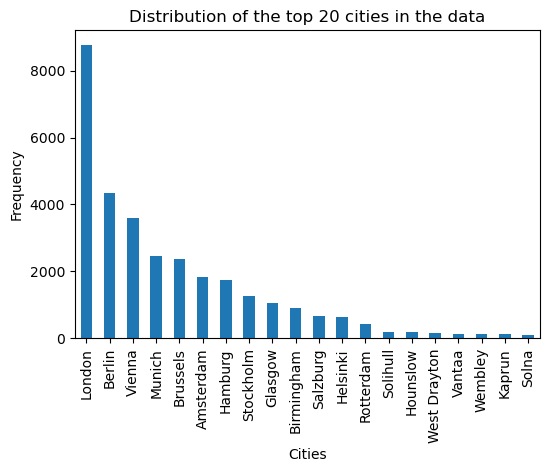

In [148]:
# Checking the distribution of the "cities" in the data
df['city_actual'].value_counts()[:20].plot(kind = 'bar', figsize = (6, 4))
plt.title('Distribution of the top 20 cities in the data')
plt.xlabel('Cities')
plt.ylabel('Frequency')
plt.show()

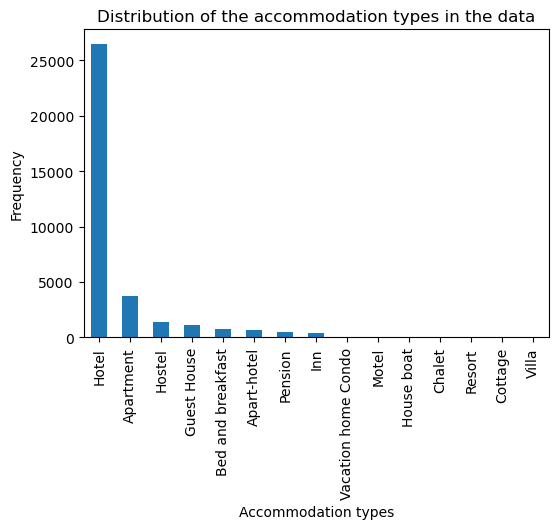

In [149]:
# Checking the distribution of the "accommodationtype" in the data
df['accommodationtype'].value_counts().plot(kind = 'bar', figsize = (6, 4))
plt.title('Distribution of the accommodation types in the data')
plt.xlabel('Accommodation types')
plt.ylabel('Frequency')
plt.show()

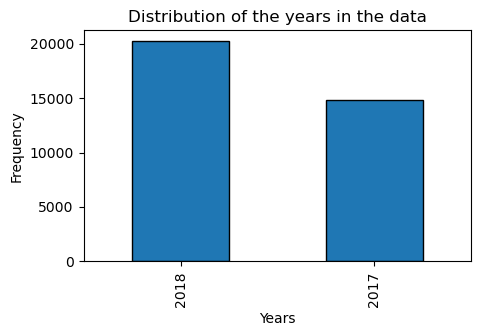

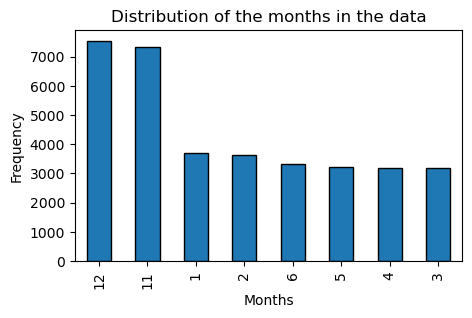

In [137]:
# Checking the distribution of the "year" and "month" in the data
df['year'].value_counts().plot(kind = 'bar', figsize = (5, 3), edgecolor = 'black')
plt.title('Distribution of the years in the data')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()

df['month'].value_counts().plot(kind = 'bar', figsize = (5, 3), edgecolor = 'black')
plt.title('Distribution of the months in the data')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.show()

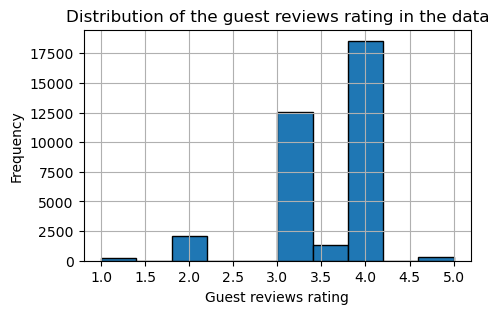

In [138]:
# Plotting the distribution of the "guestreviewsrating" in the data
df['guestreviewsrating'].hist(figsize = (5, 3), edgecolor = 'black')
plt.title('Distribution of the guest reviews rating in the data')
plt.xlabel('Guest reviews rating')
plt.ylabel('Frequency')
plt.show()

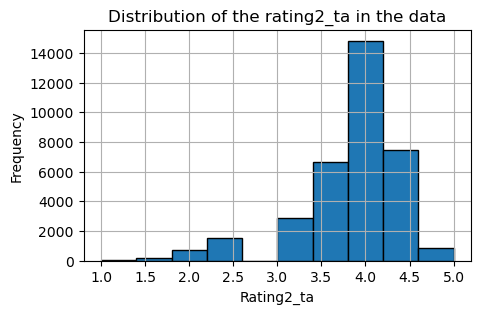

In [139]:
# Plottign the distribution of the "rating2_ta" in the data
df['rating2_ta'].hist(figsize = (5, 3), edgecolor = 'black')
plt.title('Distribution of the rating2_ta in the data')
plt.xlabel('Rating2_ta')
plt.ylabel('Frequency')
plt.show()

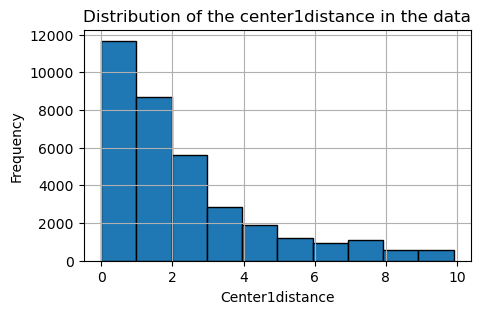

In [140]:
# plotting the distribution of the "center1distance" in the data
df['center1distance'].hist(figsize = (5, 3), edgecolor = 'black')
plt.title('Distribution of the center1distance in the data')
plt.xlabel('Center1distance')
plt.ylabel('Frequency')
plt.show()

In [147]:
# Extracting the table of variables and the number of their unique values
unique_values = df.nunique()
unique_values = pd.DataFrame(unique_values)
unique_values.reset_index(inplace = True)
unique_values.columns = ['Variables', 'Unique_values']
unique_values.sort_values(by = 'Unique_values', ascending = False, inplace = True)

# adding the data types to the table
unique_values['Data_types'] = df.dtypes.values

# storing the table in a csv file
unique_values.to_csv('unique_values.csv', index = False)

### Converting the type of categorical columns

In [34]:
# Creating a list of categorical columns
cat_cols = df.select_dtypes(include = 'object').columns
# adding "year", "month", "weekend" and "holiday" to the list of categorical columns
cat_cols = cat_cols.append(pd.Index(['year', 'month', 'weekend', 'holiday', 'scarce_room']))

# Converting the above columns to categorical type
for col in cat_cols:
    df[col] = df[col].astype('category')

In [35]:
df.shape

(35087, 16)

In [36]:
# Converting the categorical columns to dummy variables
df = pd.get_dummies(df, columns= cat_cols , drop_first = True)

In [37]:
df.head()

,rating_reviewcount,center1distance,center2distance,starrating,rating2_ta,rating2_ta_reviewcount,guestreviewsrating,real_price,addresscountryname_Belgium,addresscountryname_Finland,...,month_2,month_3,month_4,month_5,month_6,month_11,month_12,weekend_1,holiday_1,scarce_room_1
0,1030.0,3.1,3.6,4.0,4.0,1115.0,4.0,172.00,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1030.0,3.1,3.6,4.0,4.0,1115.0,4.0,81.74,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1030.0,3.1,3.6,4.0,4.0,1115.0,4.0,81.74,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1030.0,3.1,3.6,4.0,4.0,1115.0,4.0,126.96,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1030.0,3.1,3.6,4.0,4.0,1115.0,4.0,81.74,0,0,...,1,0,0,0,0,0,0,1,0,0


In [38]:
df.to_csv('cleaned_hotel2.csv', index = False)

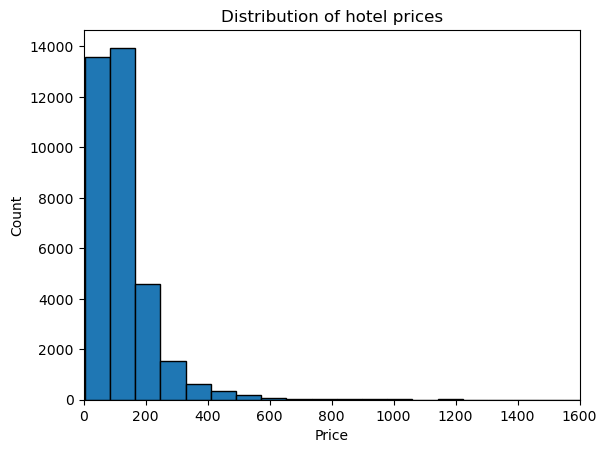

In [49]:
# checking distribution of target variable by histogram
plt.hist(df['real_price'], bins = 80, edgecolor = 'black')
plt.xlabel('Price')
plt.xlim(0,1600)
plt.ylabel('Count')
plt.title('Distribution of hotel prices')
plt.show()


### Separating Target variable and features, test and train sets.

In [50]:
# Split the data into features and target
X = df.drop('real_price', axis = 1)
y = df['real_price']

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 42)

In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: OLS Regression

* We will try several OLS models with different levels of complexity.
* At the first step we implement a model with some of the features on the right hand side. 

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Choosing some features to use in the model including all the dummies that start with "accommodationtype", "city_actual_" and center1distance	center2distance	starrating	rating2_ta	rating2_ta_reviewcount	weekend_1	holiday_1	scarce_room_1
features = ['center1distance', 'center2distance', 'starrating', 'rating2_ta', 'rating2_ta_reviewcount', 'weekend_1', 'holiday_1', 'scarce_room_1']

for i in df.columns:
    if i.startswith('accommodationtype') or i.startswith('city_actual_'):
        features.append(i)

In [55]:
# defining a model with the above features
OLS_model0 = LinearRegression()
OLS_model0.fit(X_train_scaled[:,[X.columns.get_loc(i) for i in features]], y_train)

# Checking the model performance on the training data
y_pred = OLS_model0.predict(X_train_scaled[:,[X.columns.get_loc(i) for i in features]])
ols0_train_mse = mean_squared_error(y_train, y_pred)
print('Training MSE:', ols0_train_mse)

# Checking the model performance on the test data
y_pred = OLS_model0.predict(X_test_scaled[:,[X.columns.get_loc(i) for i in features]])
ols0_test_mse = mean_squared_error(y_test, y_pred)
print('Test MSE:', ols0_test_mse)

Training MSE: 9638.92895824917
Test MSE: 8866.510712512048


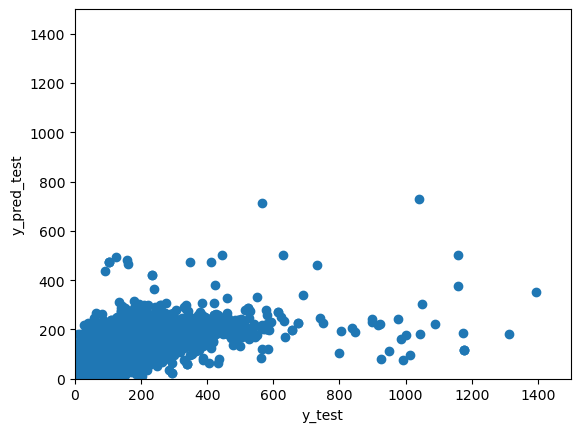

In [53]:
# Plotting y_test and y_pred to understand the spread
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1500)
plt.ylim(0, 1500)
plt.show()

# OLS with all the features

In [54]:
# Creating a linear regression model
ols_model = LinearRegression()
# Fitting the model to the training data
ols_model.fit(X_train_scaled, y_train)

# Checking the model performance on the training data
y_train_pred = ols_model.predict(X_train_scaled)
ols_train_mse = mean_squared_error(y_train, y_train_pred)
print('Training MSE:', ols_train_mse)

# Checking the model performance on the test data
y_test_pred = ols_model.predict(X_test_scaled)
ols_test_mse = mean_squared_error(y_test, y_test_pred)
print('Test MSE:', ols_test_mse)

Training MSE: 9400.643039304774
Test MSE: 8659.33685376817


In [56]:
# Importance of the features in the OLS model
ols_coef = pd.DataFrame({'feature': X_train.columns, 'importance': ols_model.coef_})
ols_coef.sort_values('importance', ascending = False)

,feature,importance
7,addresscountryname_Belgium,7.681872e+13
81,city_actual_Helsinki,3.930798e+13
217,year_2018,3.277827e+13
11,addresscountryname_Sweden,3.122685e+13
223,month_11,2.695436e+13
...,...,...
10,addresscountryname_Netherlands,-1.656212e+13
30,city_actual_Berlin,-1.829471e+13
164,city_actual_Stockholm,-2.460639e+13
8,addresscountryname_Finland,-4.441021e+13


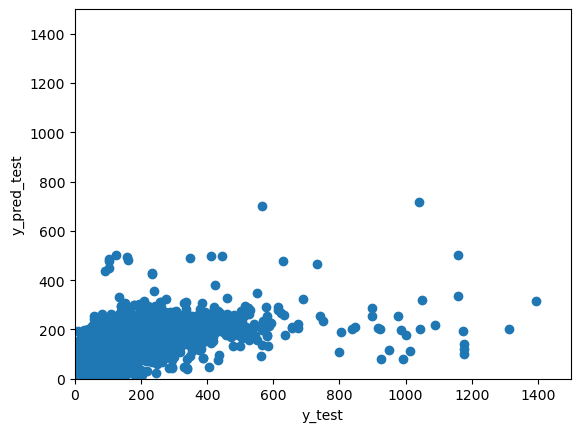

In [57]:
# Plotting y_test and y_pred to understand the spread
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1500)
plt.ylim(0, 1500)
plt.show()


# LASSO regression

In [44]:
# choosing the best alpha value for LASSO regression

import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LassoCV
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Lasso- Parameter tuning
alphas = np.logspace(-6, 2, 100)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)
# Stoing the best lambda value
selected_alpha = lasso_cv.alpha_

warnings.resetwarnings()

In [45]:
from sklearn.linear_model import Lasso


best_lasso_model = Lasso(alpha=selected_alpha)
best_lasso_model.fit(X_train_scaled, y_train)

c:\Users\PA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.895e+06, tolerance: 7.550e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.0029836472402833404)

In [49]:
# choosing the 10 most important features in the LASSO model
lasso_coef = pd.DataFrame({'feature': X_train.columns, 'importance': best_lasso_model.coef_})
lasso_coef.sort_values('importance', ascending = False).head(10)

,feature,importance
3,starrating,44.332432
116,weekend_1,23.936166
112,month_5,18.911583
117,holiday_1,17.001166
114,month_11,16.405306
113,month_6,13.844776
111,month_4,12.650746
4,rating2_ta,8.930152
5,rating2_ta_reviewcount,7.423379
110,month_3,7.215526


In [52]:
# Checking the model performance on the training data
y_train_pred = best_lasso_model.predict(X_train_scaled)
lasso_train_mse = mean_squared_error(y_train, y_train_pred)
print('Training MSE:', lasso_train_mse)

# Checking the model performance on the test data
y_test_pred = best_lasso_model.predict(X_test_scaled)
lasso_test_mse = mean_squared_error(y_test, y_test_pred)
print('Test MSE:', lasso_test_mse)

Training MSE: 6833.726728560549
Test MSE: 10947.398714901396


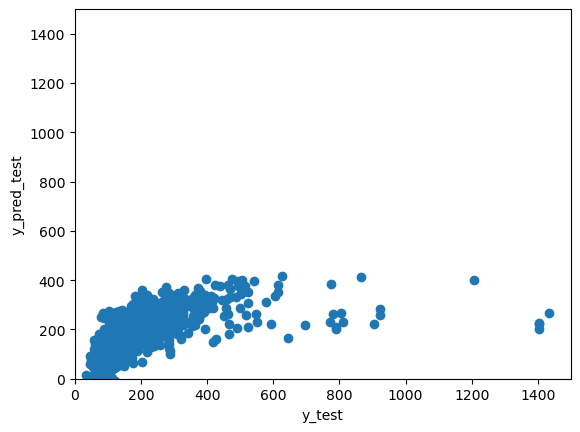

In [47]:
# Plotting y_test and y_pred to understand the spread
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1500)
plt.ylim(0, 1500)
plt.show()


# Regression Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor

# Creating a decision tree regression model
dtree_model = DecisionTreeRegressor(random_state=42)
# Fitting the model to the training data
dtree_model.fit(X_train_scaled, y_train)

# Checking the model performance on the training data
y_train_pred = dtree_model.predict(X_train_scaled)
dtree_train_mse = mean_squared_error(y_train, y_train_pred)
print('Training MSE:', dtree_train_mse)

# Checking the model performance on the test data
y_test_pred = dtree_model.predict(X_test_scaled)
dtree_test_mse = mean_squared_error(y_test, y_test_pred)
print('Test MSE:', dtree_test_mse)

Training MSE: 80.34820848859529
Test MSE: 6564.565525255947


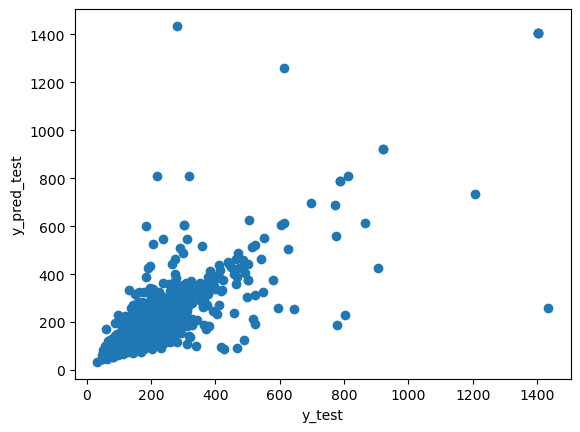

In [54]:
# Plotting y_test and y_pred to understand the spread
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.show()

# K-Nearest Neighbors (KNN) Model

In [55]:
from sklearn.neighbors import KNeighborsRegressor

# Creating a KNN regression model
knn_model = KNeighborsRegressor()
# Fitting the model to the training data
knn_model.fit(X_train_scaled, y_train)

# Checking the model performance on the training data
y_train_pred = knn_model.predict(X_train_scaled)
knn_train_mse = mean_squared_error(y_train, y_train_pred)
print('Training MSE:', knn_train_mse)

# Checking the model performance on the test data
y_test_pred = knn_model.predict(X_test_scaled)
knn_test_mse = mean_squared_error(y_test, y_test_pred)
print('Test MSE:', knn_test_mse)


Training MSE: 3973.642731199187
Test MSE: 9718.94323001355


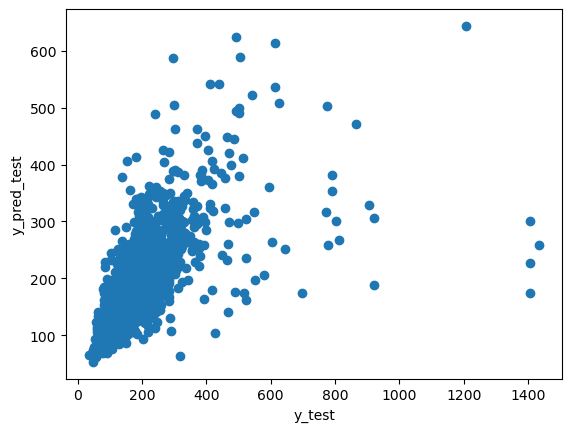

In [271]:
# Plotting y_test and y_pred to understand the spread
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.show()

# Random Forest

In [272]:
from sklearn.ensemble import RandomForestRegressor

# Creating a random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Fitting the model to the training data
rf_model.fit(X_train_scaled, y_train)

# Checking the model performance on the training data
y_train_pred = rf_model.predict(X_train_scaled)
rf_train_mse = mean_squared_error(y_train, y_train_pred)
print('Training MSE:', rf_train_mse)

# Checking the model performance on the test data
y_test_pred = rf_model.predict(X_test_scaled)
rf_test_mse = mean_squared_error(y_test, y_test_pred)
print('Test MSE:', rf_test_mse)

Training MSE: 453.4977674622347
Test MSE: 4869.300158051496


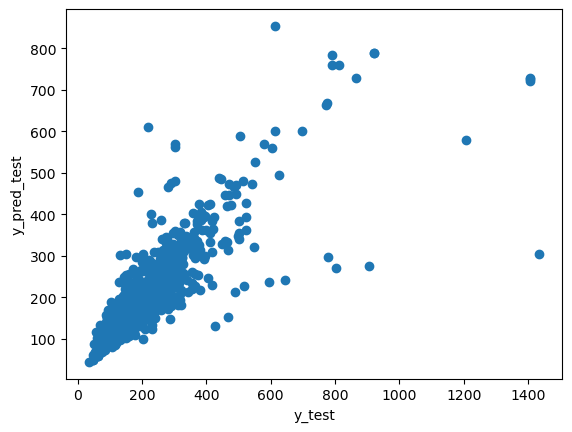

In [273]:
# Plotting y_test and y_pred to understand the spread
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.show()